### importing libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
from scipy.fft import rfft, rfftfreq #fourier transformation package
import pywt
from scipy import signal
from ssqueezepy import ssq_cwt, ssq_stft

### storing names of all csv files per folder

In [78]:
heated = ["25-1","25-2","25-3","250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
room_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
room_w = ["W-250-1","W-250-2","W-250-3","W-500-1","W-500-2","W-500-3","W-750-1","W-750-2","W-750-3","W-1000-1","W-1000-2","W-1000-3"]
sat_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
sat_w = ["W 250-1","W 250-2","W 250-3","W 500-1","W 500-2","W 500-3","W 750-1","W 750-2","W 750-3","W 1000-1","W 1000-2","W 1000-3"]

### importing one file and preprocessing it

In [79]:
#mostly dropping rows & columns
#then resetting index
df = pd.read_csv("./CSV/Room Temp/Brine/B-750-1.csv", sep=r'\s*,\s*',engine='python')
df.drop(df.index[0:14],0,inplace=True)
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df.drop(df.index[0:2], inplace=True)
df = df.reset_index(drop=True)
df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
df

,ID,Date & Time,Measurement Type,Velocity [m/s],Time 1 [Âµs],Time 2 [Âµs],Distance [m],Crack Depth [m],Correction Factor,Ambient Temperature [Â°C],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,46923,4.10.2018 3:46:13,Direct (default),1963,54.5,0,0.107,0,1,31,...,87.7,99.2,99.2,99.2,99.2,99.2,98.4,51.8,17.2,21.4
1,46922,4.10.2018 3:46:12,Direct (default),2494,42.9,0,0.107,0,1,31,...,-87.6,-99.2,-99.2,-99.2,-99.2,-99.2,-96.8,-49.6,-16.0,-20.0
2,46921,4.10.2018 3:46:11,Direct (default),2253,47.5,0,0.107,0,1,31,...,-89.2,-99.2,-99.2,-99.2,-99.2,-99.2,-95.2,-47.3,-14.2,-18.1
3,46920,4.10.2018 3:46:10,Direct (default),2131,50.2,0,0.107,0,1,31,...,-89.6,-99.2,-99.2,-99.2,-99.2,-99.2,-93.2,-45.8,-13.5,-17.1
4,46919,4.10.2018 3:46:9,Direct (default),2277,47,0,0.107,0,1,31,...,-90.2,-99.2,-99.2,-99.2,-99.2,-99.2,-92.2,-45.1,-13.3,-17.0
5,46918,4.10.2018 3:46:8,Direct (default),1911,56,0,0.107,0,1,31,...,91.7,99.2,99.2,99.2,99.2,99.2,91.8,44.9,13.5,16.5
6,46917,4.10.2018 3:46:7,Direct (default),2512,42.6,0,0.107,0,1,31,...,-91.4,-99.2,-99.2,-99.2,-99.2,-99.2,-91.1,-44.4,-13.6,-16.9
7,46916,4.10.2018 3:46:6,Direct (default),2078,51.5,0,0.107,0,1,31,...,-91.4,-99.2,-99.2,-99.2,-99.2,-99.2,-89.9,-44.3,-13.8,-17.4
8,46915,4.10.2018 3:46:5,Direct (default),2277,47,0,0.107,0,1,31,...,-91.5,-99.2,-99.2,-99.2,-99.2,-99.2,-91.1,-45.7,-15.3,-18.4
9,46914,4.10.2018 3:46:4,Direct (default),2131,50.2,0,0.107,0,1,31,...,-94.4,-99.2,-99.2,-99.2,-99.2,-99.2,-92.4,-46.9,-16.4,-19.5


In [80]:
time = np.arange(start=0, stop=199, step=0.5) #x-axis for the observations

### plotting all observations for a csv

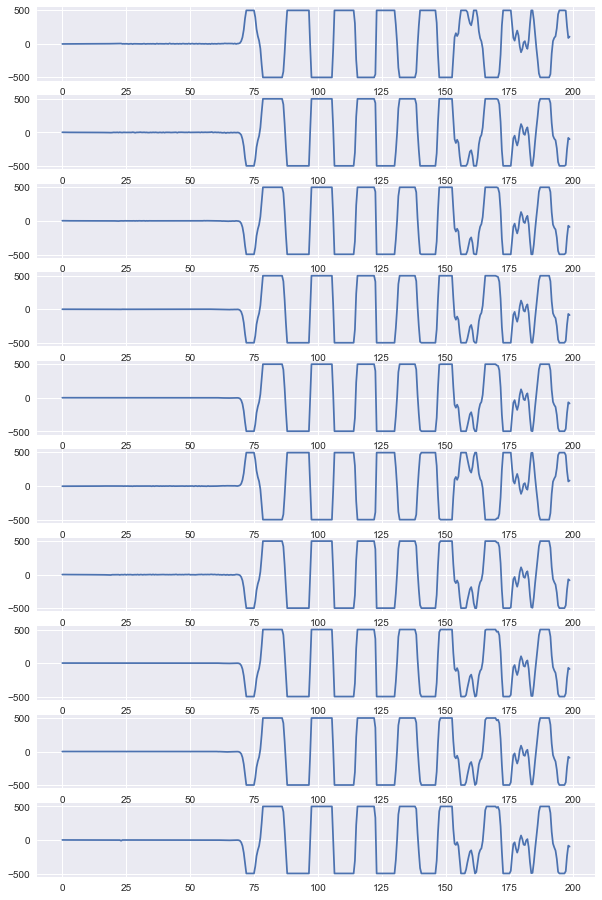

In [81]:
fig, axs = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs[i].plot(time, df.iloc[i, 21:].astype(float)*5) 
#df.iloc[i, 21:] gives all the values for each observation
#multiplied by 5 because amplitude is 500

### plotting all fft'ed graphs for all observations of a csv

In [82]:
np.abs(rfft(df.iloc[i][21:]*5))

array([4.34100000e+03, 1.58814516e+03, 1.23221117e+03, 2.01313092e+03,
       4.32823506e+03, 2.08097143e+03, 4.96959626e+03, 1.09977477e+04,
       6.57127633e+03, 2.62219508e+04, 1.25016372e+04, 5.18153729e+04,
       5.55818689e+04, 2.11606567e+04, 1.40991858e+04, 1.38212658e+04,
       7.81039561e+03, 5.99044060e+03, 1.37764338e+04, 1.18163467e+04,
       1.72382669e+04, 9.07801812e+03, 7.41575712e+03, 2.76710137e+03,
       3.30571397e+03, 3.73890103e+03, 2.44066779e+03, 3.52779501e+03,
       3.50315119e+03, 5.46764983e+03, 6.10606475e+03, 4.39440702e+03,
       4.95386678e+03, 7.52094828e+03, 5.59107308e+03, 9.37031802e+03,
       1.32696891e+04, 1.02472390e+04, 4.46247410e+03, 2.89528776e+03,
       2.91554840e+03, 3.43121703e+03, 2.06314881e+03, 1.94617839e+03,
       1.03908812e+03, 2.00564547e+03, 3.68171902e+03, 9.40481595e+02,
       1.56962702e+03, 2.62754395e+03, 1.94596978e+03, 4.79389047e+03,
       6.02757507e+03, 9.29792103e+02, 3.23869577e+03, 3.44838913e+03,
      

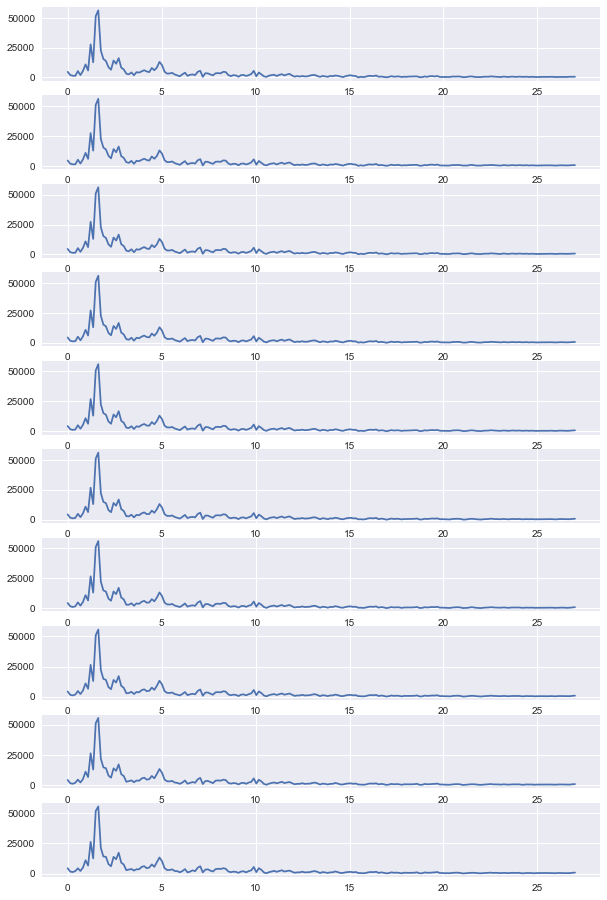

In [83]:
fig_f, axs_f = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs_f[i].plot(rfftfreq(len(df.iloc[i][21:]), 1/54), np.abs(rfft(df.iloc[i][21:]*5)))

# actual required part of the project

### creating the dataframe that stores the frequency values obtained from fft

In [84]:
np.where(np.abs(rfft(df.iloc[i][21:]))==np.max(np.abs(rfft(df.iloc[i][21:]))))[0][0]

12

In [85]:
np.abs(rfft(df.iloc[i][21:]))

array([8.68200000e+02, 3.17629033e+02, 2.46442233e+02, 4.02626185e+02,
       8.65647012e+02, 4.16194286e+02, 9.93919252e+02, 2.19954954e+03,
       1.31425527e+03, 5.24439016e+03, 2.50032743e+03, 1.03630746e+04,
       1.11163738e+04, 4.23213133e+03, 2.81983717e+03, 2.76425316e+03,
       1.56207912e+03, 1.19808812e+03, 2.75528676e+03, 2.36326934e+03,
       3.44765338e+03, 1.81560362e+03, 1.48315142e+03, 5.53420273e+02,
       6.61142793e+02, 7.47780205e+02, 4.88133557e+02, 7.05559003e+02,
       7.00630238e+02, 1.09352997e+03, 1.22121295e+03, 8.78881405e+02,
       9.90773356e+02, 1.50418966e+03, 1.11821462e+03, 1.87406360e+03,
       2.65393781e+03, 2.04944781e+03, 8.92494821e+02, 5.79057553e+02,
       5.83109681e+02, 6.86243407e+02, 4.12629763e+02, 3.89235678e+02,
       2.07817624e+02, 4.01129095e+02, 7.36343804e+02, 1.88096319e+02,
       3.13925405e+02, 5.25508789e+02, 3.89193956e+02, 9.58778094e+02,
       1.20551501e+03, 1.85958421e+02, 6.47739155e+02, 6.89677826e+02,
      

In [86]:
rfftfreq(len(df.iloc[i][21:]), 1/54)[12]

1.6281407035175879

In [87]:
new_df = pd.DataFrame(columns = ['Type', 'Sub Type', 'Temperature', 'ID', 'Max Frequency', 'Mean Frequency', 'Centroid', 'Thermal Damage'])
new_df

,Type,Sub Type,Temperature,ID,Max Frequency,Mean Frequency,Centroid,Thermal Damage


### looping through the csv files in the heated folder, preprocessing it, running observations through fft then calculating and storing the required frequencies

In [88]:
np.where(np.abs(rfft(df.iloc[i][21:]))==np.mean(np.abs(rfft(df.iloc[i][21:]))))
#rfftfreq(len(df.iloc[i][21:]), 1/54)[mean_freq_index]

(array([], dtype=int64),)

In [89]:
vO = 3815.6

In [90]:
for df_name in heated:
    df = pd.read_csv("./CSV/Heated/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
    df.drop(df.index[0:14],0,inplace=True)
    df = df.reset_index(drop=True)
    df.columns = df.iloc[0]
    df.drop(df.index[0:2], inplace=True)
    df = df.reset_index(drop=True)
    df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
    for i in df.index:
        amp = np.abs(rfft(df.iloc[i][21:]))
        max_freq_index = np.where(np.abs(rfft(df.iloc[i][21:]))==np.max(np.abs(rfft(df.iloc[i][21:]))))[0][0]
        max_freq = rfftfreq(len(df.iloc[i][21:]), 1/54)[max_freq_index]
        freq = rfftfreq(len(df.iloc[i][21:]), 1/54)
        amp_sum = np.sum(amp)
        centroid_freq = 0.0
        for j in range(len(freq)):
            centroid_freq += freq[j]*amp[j]
        centroid_freq/=(amp_sum*1.0)
        therm_damage = 1 - (float(df.iloc[i]["Velocity [m/s]"])/3886.7)**2
        new_df.loc[len(new_df.index)] = ['Heated', '', df_name[:-2], df['ID'][i], max_freq, np.mean(freq), centroid_freq, therm_damage]

### doing the same as above for room temperature csv files

In [91]:
for df_type in [room_b, room_w]:
    for df_name in df_type:
        sub_type = 'Brine' if df_name[0]=='B' else 'Water' #checking subtype based on first letter of the csv files
        df = pd.read_csv("./CSV/Room Temp/"+sub_type+"/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
        df.drop(df.index[0:14],0,inplace=True)
        df = df.reset_index(drop=True)
        df.columns = df.iloc[0]
        df.drop(df.index[0:2], inplace=True)
        df = df.reset_index(drop=True)
        df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
        for i in df.index:
            amp = np.abs(rfft(df.iloc[i][21:]))
            max_freq_index = np.where(np.abs(rfft(df.iloc[i][21:]))==np.max(np.abs(rfft(df.iloc[i][21:]))))[0][0]
            max_freq = rfftfreq(len(df.iloc[i][21:]), 1/54)[max_freq_index]
            freq = rfftfreq(len(df.iloc[i][21:]), 1/54)
            amp_sum = np.sum(amp)
            centroid_freq = 0.0
            for j in range(len(freq)):
                centroid_freq += freq[j]*amp[j]
            centroid_freq/=(amp_sum*1.0)
            therm_damage = (float(df.iloc[i]["Velocity [m/s]"])/3886.7)**2
            new_df.loc[len(new_df.index)] = ['Heated', sub_type, df_name[2:-2], df['ID'][i], max_freq, np.mean(freq), centroid_freq, therm_damage]

### doing the same as above for saturated csv files

In [97]:
for df_type in [sat_b, sat_w]:
    for df_name in df_type:
        sub_type = 'Brine' if df_name[0]=='B' else 'Water' #checking subtype based on first letter of the csv files
        df = pd.read_csv("./CSV/Saturated/"+sub_type+"/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
        df.drop(df.index[0:14],0,inplace=True)
        df = df.reset_index(drop=True)
        df.columns = df.iloc[0]
        df.drop(df.index[0:2], inplace=True)
        df = df.reset_index(drop=True)
        df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
        for i in df.index:
            amp = np.abs(rfft(df.iloc[i][21:]))
            max_freq_index = np.where(np.abs(rfft(df.iloc[i][21:]))==np.max(np.abs(rfft(df.iloc[i][21:]))))[0][0]
            max_freq = rfftfreq(len(df.iloc[i][21:]), 1/54)[max_freq_index]
            freq = rfftfreq(len(df.iloc[i][21:]), 1/54)
            amp_sum = np.sum(amp)
            centroid_freq = 0.0
            for j in range(len(freq)):
                centroid_freq += freq[j]*amp[j]
            centroid_freq/=(amp_sum*1.0)
            therm_damage = (float(df.iloc[i]["Velocity [m/s]"])/3886.7)**2
            new_df.loc[len(new_df.index)] = ['Heated', sub_type, df_name[2:-2], df['ID'][i], max_freq, np.mean(freq), centroid_freq, therm_damage]

IndexError: index 0 is out of bounds for axis 0 with size 0

### sorting the dataframe wrt the ID of each observation and then exporting it

In [ ]:
new_df = new_df.sort_values('ID')
new_df = new_df.reset_index(drop=True) #resetting index after sorting
new_df.to_csv("Fourier Frequencies.csv", index=False) #exporting dataframe

In [ ]:
new_df

In [ ]:
wavelist = ['gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl']
wavelist

In [ ]:
pywt.central_frequency('mexh')

In [ ]:
fig_test, axs_test = plt.subplots(3, figsize=(10,8))
coef, freq = pywt.cwt(df.iloc[0][21:], np.arange(1, 31), 'mexh')
cwtmatr = signal.cwt(df.iloc[0][21:], signal.ricker, np.arange(1,31))
axs_test[0].plot(time, df.iloc[0][21:])
axs_test[1].imshow(coef, cmap = 'coolwarm', aspect = 'auto')
#axs_test[2].imshow(cwtmatr, cmap='coolwarm', aspect='auto')
axs_test[2].plot(rfftfreq(len(df.iloc[0][21:]), 1/54), np.abs(rfft(df.iloc[0][21:]*5)))
plt.show()

In [ ]:
len(coef)

In [ ]:
rfftfreq(len(df.iloc[i][21:]), 1/54)

In [ ]:
freq #scales

In [ ]:
cwtmatr

In [ ]:
fig_w, axs_w = plt.subplots(len(wavelist), figsize=(10,16))
for i in range(len(wavelist)):
    coef = signal.cwt(df.iloc[0][21:], signal.ricker, np.arange(1,31))
    axs_w[i].imshow(coef, cmap = 'coolwarm', aspect = 'auto')   

In [ ]:
len(coef[0])

In [ ]:
plt.plot(freq)

In [ ]:
plt.plot(abs(coef))
plt.show()